In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis.perf_metrics import get_predictions, get_auroc, get_aupr
import utility.pickle_utils as pickle_utils

In [2]:
label2index_dict = pickle_utils.load(home_dir+"data/processed/peakfilename_index_dict.pkl")
list(label2index_dict.items())[0]

('wgEncodeAwgTfbsBroadDnd41CtcfUniPk', 0)

In [3]:
result_df = pd.read_csv(home_dir+"analysis/summaries/dnabert2_vs_dnabert2epbd_vs_dnabert2randepbd_on_test.tsv", sep="\t")
result_df.sort_values(by="auroc_dnabert2epbdVSdnabert2_relative", ascending=False, inplace=True)
top_x_tfbinding_improved_indices = result_df["index"].tolist()[:20]
# result_df

In [4]:
best_model_name = "dnabert2_epbd_crossattn_bestmodel"
dnabert2_preds_and_targets_dict = get_predictions("dnabert2", "test", compute_again=False, home_dir=home_dir)
dnabert2_epbd_preds_and_targets_dict = get_predictions(best_model_name, "test", compute_again=False, home_dir=home_dir)

(165321, 690) (165321, 690)
(165321, 690) (165321, 690)


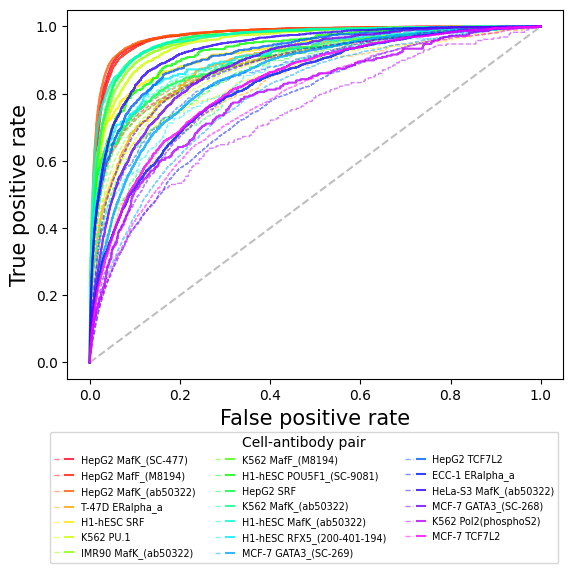

In [14]:
# plotting fpr vs tpr for the top X improved performances
from matplotlib.legend_handler import HandlerTuple

top_x = 20
result_df = pd.read_csv(home_dir+"analysis/summaries/dnabert2_vs_dnabert2epbd_vs_dnabert2randepbd_on_test.tsv", sep="\t")
result_df.sort_values(by="auroc_dnabert2epbdVSdnabert2_relative", ascending=False, inplace=True)
top_x_tfbinding_improved_indices = result_df["index"].tolist()[:top_x]

cm = plt.get_cmap('gist_rainbow')
plt.plot([0,1], [0,1], linestyle="--", color="gray", alpha=0.5, label="Random") # for auroc

plots = []
legends = []
for i, idx in enumerate(top_x_tfbinding_improved_indices):
    legend = (result_df[result_df["index"]==idx]["cell"] +" "+ result_df[result_df["index"]==idx]["antibody"]).values[0]
    task_id = label2index_dict[idx]
    # rgba = cmap(np.random.rand(seed=41))
    
    preds_a, targets_a = dnabert2_preds_and_targets_dict["preds"], dnabert2_preds_and_targets_dict["targets"]
    prob_a, obs_a = preds_a[:, task_id], targets_a[:, task_id]
    _, fpr, tpr, _ = get_auroc(prob_a, obs_a)
    p1, = plt.plot(fpr, tpr, linestyle="--", linewidth=1, alpha=.5)#, markersize=2,marker='.', color="coral",)
    p1.set_color(cm(i//1*1.0/top_x))
    
    
    preds_b, targets_b = dnabert2_epbd_preds_and_targets_dict["preds"], dnabert2_epbd_preds_and_targets_dict["targets"]
    prob_b, obs_b = preds_b[:, task_id], targets_b[:, task_id]
    _, fpr, tpr, _ = get_auroc(prob_b, obs_b)
    p2, = plt.plot(fpr, tpr, linestyle="-", linewidth=1.5, alpha=.8)#, markersize=2,marker='.')color="steelblue",
    p2.set_color(cm(i//1*1.0/top_x))
    
    plots.append((p1, p2))
    legends.append(legend)
    # break
# plt.legend(plots, legends, numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(1, 1), ncols=1, fontsize="small") # on the right
plt.legend(plots, legends, numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(1, -.13), ncols=3, fontsize="x-small", title="Cell-antibody pair") # on the bottom

plt.xlabel("False positive rate", fontsize=15)
plt.ylabel("True positive rate", fontsize=15)

plt.savefig(home_dir+f"analysis/figures/dnabert2_vs_dnabert2_epbd_crossattn_{top_x}_auroc_improvements.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
plt.show()

In [10]:
result_df.columns

Index(['filename', 'project', 'lab', 'composite', 'dataType', 'view', 'cell',
       'treatment', 'antibody', 'control', 'dataVersion', 'dccAccession',
       'controlId', 'quality', 'tableName', 'type', 'md5sum', 'size', 'index',
       'labels_count', 'baseline_aupr', 'cls_weights', 'dnabert2_auroc',
       'dnabert2_aupr', 'dnabert2_epbd_crossattn_bestmodel_auroc',
       'dnabert2_epbd_crossattn_bestmodel_aupr',
       'dnabert2_randepbd_crossattn_auroc', 'dnabert2_randepbd_crossattn_aupr',
       'auroc_dnabert2epbdVSdnabert2_percent',
       'auroc_dnabert2epbdVSdnabert2_relative',
       'aupr_dnabert2epbdVSdnabert2_percent',
       'aupr_dnabert2epbdVSdnabert2_relative',
       'auroc_dnabert2randepbdVSdnabert2_percent',
       'auroc_dnabert2randepbdVSdnabert2_relative',
       'aupr_dnabert2randepbdVSdnabert2_percent',
       'aupr_dnabert2randepbdVSdnabert2_relative'],
      dtype='object')

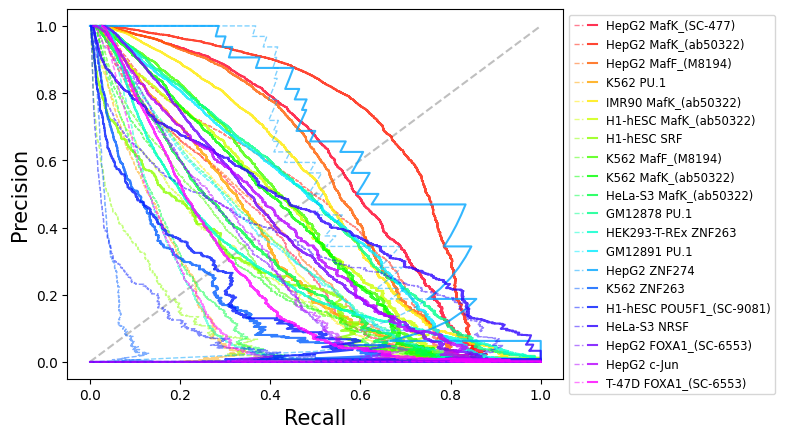

In [11]:
# plotting precision vs recall for the top X improved performances
# this is not good
from matplotlib.legend_handler import HandlerTuple

top_x = 20
result_df = pd.read_csv(home_dir+"analysis/summaries/dnabert2_vs_dnabert2epbd_vs_dnabert2randepbd_on_test.tsv", sep="\t")
result_df.sort_values(by="aupr_dnabert2epbdVSdnabert2_relative", ascending=False, inplace=True)
top_x_tfbinding_improved_indices = result_df["index"].tolist()[:top_x]

cm = plt.get_cmap('gist_rainbow')
plt.plot([0,1], [0,1], linestyle="--", color="gray", alpha=0.5, label="Random") # for auroc

plots = []
legends = []
for i, idx in enumerate(top_x_tfbinding_improved_indices):
    legend = (result_df[result_df["index"]==idx]["cell"] +" "+ result_df[result_df["index"]==idx]["antibody"]).values[0]
    task_id = label2index_dict[idx]
    # rgba = cmap(np.random.rand(seed=41))
    
    preds_a, targets_a = dnabert2_preds_and_targets_dict["preds"], dnabert2_preds_and_targets_dict["targets"]
    prob_a, obs_a = preds_a[:, task_id], targets_a[:, task_id]
    _, fpr, tpr, _ = get_aupr(prob_a, obs_a)
    p1, = plt.plot(fpr, tpr, linestyle="--", linewidth=1, alpha=.5)#, markersize=2,marker='.', color="coral",)
    p1.set_color(cm(i//1*1.0/top_x))
    
    
    preds_b, targets_b = dnabert2_epbd_preds_and_targets_dict["preds"], dnabert2_epbd_preds_and_targets_dict["targets"]
    prob_b, obs_b = preds_b[:, task_id], targets_b[:, task_id]
    _, fpr, tpr, _ = get_aupr(prob_b, obs_b)
    p2, = plt.plot(fpr, tpr, linestyle="-", linewidth=1.5, alpha=.8)#, markersize=2,marker='.')color="steelblue",
    p2.set_color(cm(i//1*1.0/top_x))
    
    plots.append((p1, p2))
    legends.append(legend)
    # break
plt.legend(plots, legends, numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(1, 1), ncols=1, fontsize="small")
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)

# plt.savefig(home_dir+f"analysis/figures/dnabert2_vs_dnabert2_epbd_crossattn_{top_x}_aupr_improvements.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
plt.show()

In [14]:
import matplotlib

result_df = pd.read_csv(home_dir+"analysis/summaries/dnabert2_vs_dnabert2epbd_vs_dnabert2randepbd_on_test.tsv", sep="\t")
result_df.sort_values(by="dnabert2_aupr", ascending=False, inplace=True)
top_x_tfbinding_improved_indices = result_df["index"].tolist()[150:]

cmap = matplotlib.cm.get_cmap('tab20')


for idx in top_x_tfbinding_improved_indices:
    task_id = label2index_dict[idx]

    no_skill = result_df[result_df["index"]==idx]["baseline_auprc"]
    rgba = cmap(np.random.rand())
    plt.plot([0,1], [no_skill, no_skill], linestyle="--", color="gray", alpha=0.6) # for aupr

    # preds_a, targets_a = dnabert2_preds_and_targets_dict["preds"], dnabert2_preds_and_targets_dict["targets"]
    # prob_a, obs_a = preds_a[:, task_id], targets_a[:, task_id]
    # _, prec_a, rec_a, _ = get_aupr(prob_a, obs_a)
    # plt.plot(rec_a, prec_a, label=f'{idx}', linestyle="dotted", linewidth=1, color="gray", alpha=.5)#, markersize=2,marker='.')
    
    preds_b, targets_b = dnabert2_epbd_preds_and_targets_dict["preds"], dnabert2_epbd_preds_and_targets_dict["targets"]
    prob_b, obs_b = preds_b[:, task_id], targets_b[:, task_id]
    _, prec_b, rec_b, _ = get_aupr(prob_b, obs_b)
    plt.plot(rec_b, prec_b, label=f'{idx}', linestyle="dotted", linewidth=1, color="gray", alpha=.5)#, markersize=2,marker='.')

plt.plot([0,1], [1,0], linestyle="solid", color="black") # for aupr
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)
# plt.legend()

/tmp/ipykernel_260356/3184155705.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab20')


KeyError: 'baseline_auprc'